In [3]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

In [4]:
import datetime
import pyaurorax

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

at.set_theme("dark")

In [5]:
# download an hour of THEMIS ASI data
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2022, 8, 30, 4, 0)
end_dt = datetime.datetime(2022, 8, 30, 5, 0)
site_uid = "pina"
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)

In [6]:
# read in the hour of data
data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

In [7]:
import numpy as np

In [141]:
# scale all the images
#
# NOTE: you can scale all images or just one image
images_scaled = at.scale_intensity(data.data, min=5, max=60)

NEED to play with the code a bit more, it works with themis data but i get the black screen with trex data, also line dimensions change... why?

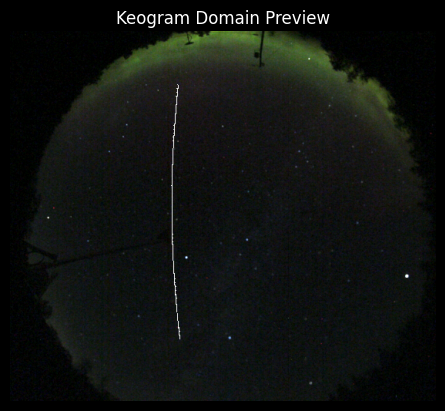

In [157]:
# Define a curve in ccd_space
ccd_y = np.linspace(80, 410, 200) #(Height of bottom of the line, height of top of the line,)
ccd_x = 230 - 20 * np.sin(np.pi * ccd_y / 510)

custom_keogram = at.keogram.create_custom(images_scaled,
                                          data.timestamp,
                                          coordinate_system='ccd',
                                          width=2,  
                                          x_locs=ccd_x, 
                                          y_locs=ccd_y,
                                          preview=True,
                                          )

In [153]:
custom_keogram.plot(title="8-30-2022 Pinawa TREx RGB", aspect=7, figsize = [8, 12], savefig = True, savefig_filename = 'Pinawa.custom.keogram.plot.png')

### **Custom Keogram in Lat/Lon Space**

In [68]:
# First, download and read an hour of TREx RGB Data
site_uid = "pina"
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2022, 8, 30, 4, 0)
end_dt = datetime.datetime(2022, 8, 30, 5, 0)
r = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid)
rgb_data = aurorax.data.ucalgary.read(r.dataset, r.filenames, n_parallel=5)

# Grab the corresponding skymap
dataset_name = "TREX_RGB_SKYMAP_IDLSAV"
r = aurorax.data.ucalgary.download_best_skymap(dataset_name, site_uid, start_dt)
skymap_data = aurorax.data.ucalgary.read(r.dataset, r.filenames)

rgb_images = at.scale_intensity(rgb_data.data, min=1, max=60)
rgb_skymap = skymap_data.data[0]

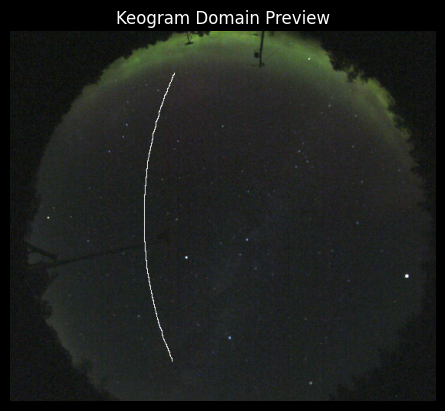

In [72]:
latitudes = np.linspace(48.5, 52.5, 50)
longitudes = -102.4 + 5.4 * np.sin(np.pi * (latitudes - 25.0) / (80.0 - 25.0))

geo_keo = at.keogram.create_custom(rgb_images,
                                   data.timestamp,
                                   coordinate_system='geo',
                                   width=2,          
                                   x_locs=longitudes, 
                                   y_locs=latitudes,
                                   preview=True,
                                   altitude_km=115,
                                   skymap=rgb_skymap,
                                   metric="median")

In [67]:
#FIGURE OUT HOW TO ACTUALLY ADD GEO COORDINATES TO THESE

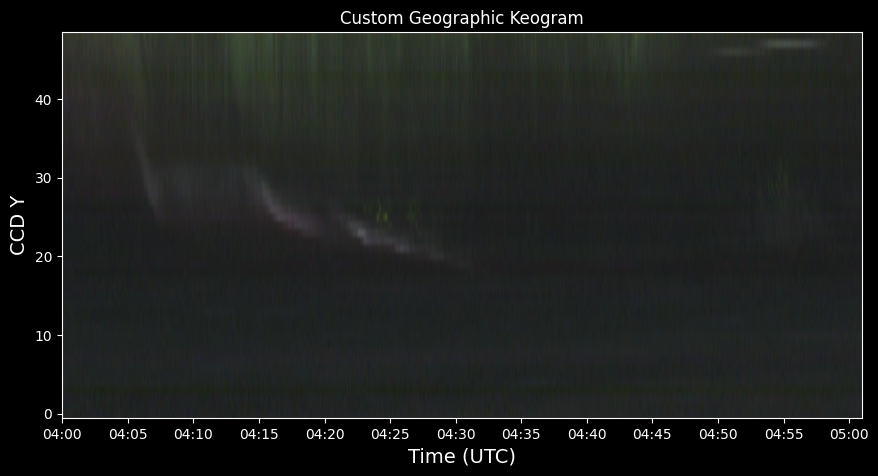

In [79]:
geo_keo.plot(title="Custom Geographic Keogram", aspect=12, figsize = [8, 10])